In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers,models
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-11-27 09:06:17.053218: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-27 09:06:17.054977: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 09:06:17.064617: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-27 09:06:17.098926: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 09:06:17.155763: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
dataset = pd.read_csv("/home/aditya/ADITYA/Projects/Denoise/audio_features.csv")

In [3]:
dataset 

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,label
0,-299.82755,161.920550,-42.986015,17.291681,-9.258543,0.352771,-22.677830,-16.391844,-20.816635,-6.810088,...,0.200054,0.166085,0.288850,0.146710,0.210376,0.234634,0.390072,0.343456,0.241421,9
1,-159.23601,141.497200,-72.412490,-14.045747,-31.530480,-2.079339,-31.011710,3.170327,-22.956690,-2.027877,...,0.300713,0.365584,0.182047,0.241449,0.430506,0.307052,0.353095,0.198946,0.270798,4
2,-347.25380,81.683920,4.630914,29.517320,-2.358563,7.258026,1.432311,11.312077,-11.228522,8.196815,...,0.354507,0.266855,0.257950,0.272695,0.276310,0.290093,0.270885,0.282254,0.289429,2
3,-236.47750,169.871190,-36.489277,33.065678,-11.959123,26.728968,-29.550335,22.830448,-19.267536,5.290238,...,0.245136,0.229481,0.262452,0.237843,0.503760,0.319610,0.238971,0.241377,0.295423,0
4,-391.06015,106.025536,3.993231,28.169186,13.174751,6.092801,-15.872272,-2.305582,-5.397427,-5.592200,...,0.260017,0.255695,0.259007,0.309162,0.313341,0.282600,0.243095,0.225221,0.173567,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,-127.10550,75.694000,-40.375282,52.278736,1.591725,30.898699,-9.234956,27.621975,1.926606,-0.616720,...,0.208848,0.189586,0.216372,0.239839,0.435918,0.405155,0.368892,0.138490,0.220771,0
8728,-337.26440,142.297150,-68.321785,33.001240,-29.197311,16.973269,7.759877,9.823354,6.562455,10.994356,...,0.332337,0.399194,0.452183,0.249549,0.269017,0.250904,0.238200,0.196331,0.221189,5
8729,-528.29890,136.650330,6.392556,1.529255,-13.484799,-8.145865,-5.186058,6.606945,0.167064,-5.328062,...,0.284440,0.270789,0.245537,0.268527,0.272564,0.318459,0.316753,0.302065,0.296234,3
8730,-257.98395,147.511120,-26.680098,49.505590,-13.572097,38.290874,-8.247279,21.642666,-11.039514,21.161846,...,0.315960,0.249379,0.227828,0.193679,0.145686,0.556835,0.260564,0.321886,0.152597,0


In [4]:
X=dataset.iloc[:,:-1].values
Y=dataset['label']
L=[0,0,0,0,0,0,0,0,0,0,0]
num =[0,1,2,3,4,5,6,7,8,9]
for i in Y:
    if i in num:
        L[i]=L[i]+1
print(L)
    

[1000, 429, 1000, 1000, 1000, 1000, 374, 1000, 929, 1000, 0]


In [5]:
X

array([[-2.9982755e+02,  1.6192055e+02, -4.2986015e+01, ...,
         3.9007150e-01,  3.4345585e-01,  2.4142067e-01],
       [-1.5923601e+02,  1.4149720e+02, -7.2412490e+01, ...,
         3.5309494e-01,  1.9894566e-01,  2.7079767e-01],
       [-3.4725380e+02,  8.1683920e+01,  4.6309137e+00, ...,
         2.7088463e-01,  2.8225362e-01,  2.8942886e-01],
       ...,
       [-5.2829890e+02,  1.3665033e+02,  6.3925557e+00, ...,
         3.1675318e-01,  3.0206516e-01,  2.9623410e-01],
       [-2.5798395e+02,  1.4751112e+02, -2.6680098e+01, ...,
         2.6056445e-01,  3.2188594e-01,  1.5259673e-01],
       [-4.4302002e+02,  2.4394133e+02,  1.3164351e+01, ...,
         3.1906390e-01,  3.0100134e-01,  2.3822118e-01]])

In [6]:
Y

0       9
1       4
2       2
3       0
4       2
       ..
8727    0
8728    5
8729    3
8730    0
8731    8
Name: label, Length: 8732, dtype: int64

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [8]:
X_train[0]

array([-2.2112790e+02,  1.3935027e+02, -3.4536190e+01,  3.7732185e+01,
        4.5582232e+00,  2.7943910e+01,  1.5129298e+01,  2.7666819e+01,
        3.5101502e+00, -3.7082863e+00, -7.7212496e+00,  4.2292770e+00,
        1.3113237e+01,  3.1563750e-01,  3.7316638e-01,  4.6770117e-01,
        5.9915006e-01,  9.6204656e-01,  8.9669630e-01,  7.3897594e-01,
        5.2192044e-01,  3.2524493e-01,  2.4438609e-01,  2.2406030e-01,
        2.5358740e-01,  5.4715830e-01,  6.6732320e-01,  9.3359375e-01,
        5.8571386e-01,  6.2363510e-01,  6.7985200e-01,  6.3555940e-01,
        4.5766822e-01,  5.5255467e-01,  4.8628008e-01,  5.2492520e-01,
        4.9222660e-01,  2.4482463e-01,  3.7658268e-01,  4.0318424e-01,
        2.5257003e-01,  2.6100817e-01,  3.4093690e-01,  2.5450382e-01,
        2.1931803e-01,  2.4765000e-01,  2.4343745e-01,  2.5166770e-01,
        2.4482463e-01])

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled[0]

array([0.63259969, 0.54758198, 0.55712221, 0.66115125, 0.57872457,
       0.67289017, 0.60572617, 0.76795724, 0.4991559 , 0.47601749,
       0.46283342, 0.5993562 , 0.67373666, 0.31466069, 0.37212531,
       0.46493751, 0.60138306, 0.96193662, 0.89645071, 0.73847868,
       0.53243861, 0.32469904, 0.24366763, 0.22353808, 0.25239203,
       0.52694478, 0.66230156, 0.93229356, 0.56341192, 0.61364695,
       0.67232008, 0.62903492, 0.43445232, 0.53220536, 0.46965728,
       0.51181552, 0.47463338, 0.34413077, 0.50407524, 0.45186891,
       0.30781069, 0.31787317, 0.40150142, 0.33061098, 0.30437037,
       0.2970988 , 0.30210365, 0.31880632, 0.29594658])

In [11]:
X.shape

(8732, 49)

In [12]:
model = models.Sequential([
    layers.Input(shape=(1, 49, 1)),  
    layers.Conv2D(128, (5, 5), padding='same', activation='relu', strides=1),
    
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Conv2D(256, (5, 5), padding='same', activation='relu', strides=1),
    
    layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
    
    layers.Dropout(0.3),
    
    layers.Flatten(),
    
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 1, 49, 128)     │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 1, 25, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 1, 25, 256)     │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 13, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 13, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3328)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,704,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,062,794 (11.68 MB)

 Trainable params: 3,062,794 (11.68 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
print("Unique values in Y_train:", np.unique(Y_train))
print("Unique values in Y_test:", np.unique(Y_test))


Unique values in Y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in Y_test: [0 1 2 3 4 5 6 7 8 9]


In [14]:
Y_train

3569    5
138     7
8165    7
7854    0
2332    3
       ..
3521    4
4154    4
8174    9
5476    9
4210    2
Name: label, Length: 6985, dtype: int64

In [15]:
# Y_train=Y_train-1
# Y_test=Y_test-1

Y_train = to_categorical(Y_train, num_classes=10)
Y_test = to_categorical(Y_test, num_classes=10)


In [16]:
Y_train[len(Y_train)-1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
X_train_scaled = X_train_scaled.reshape(-1, 1, 49, 1)
X_test_scaled = X_test_scaled.reshape(-1, 1, 49, 1)

In [18]:
X_train_scaled[0].shape

(1, 49, 1)

In [24]:
# Fit the model
history = model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), batch_size=50, epochs=40)

Epoch 1/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9727 - loss: 0.0734 - val_accuracy: 0.9170 - val_loss: 0.2728
Epoch 2/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9730 - loss: 0.0883 - val_accuracy: 0.9181 - val_loss: 0.2701
Epoch 3/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - accuracy: 0.9630 - loss: 0.1033 - val_accuracy: 0.9222 - val_loss: 0.2510
Epoch 4/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - accuracy: 0.9744 - loss: 0.0692 - val_accuracy: 0.9250 - val_loss: 0.2417
Epoch 5/40
 97/140 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9799 - loss: 0.0582

KeyboardInterrupt: 

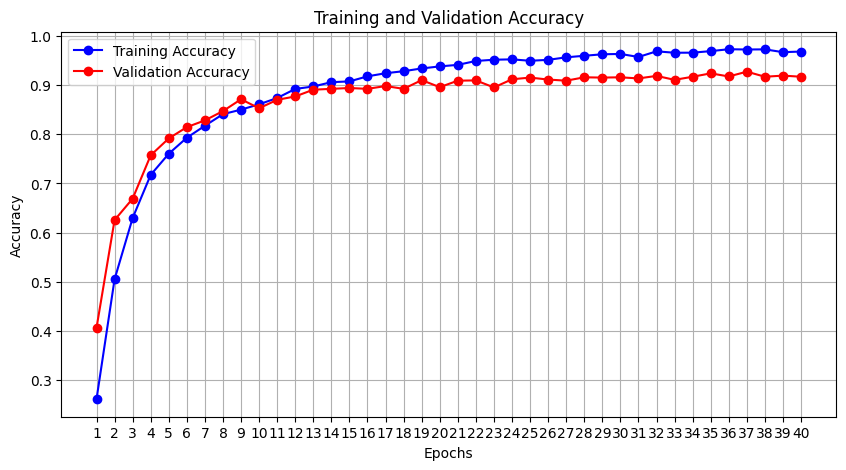

In [20]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting epochs
epochs = range(1, len(train_acc) + 1)

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')

# Adding titles and labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)  # Set x-ticks to the number of epochs
plt.legend()
plt.grid()

# Display the plot
plt.show()

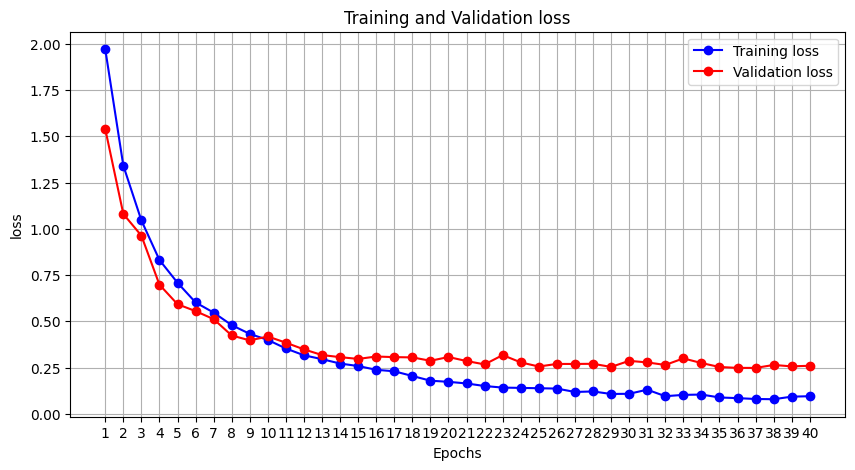

In [23]:
train_loss = history.history['loss']
val_loss= history.history['val_loss']

# Extracting epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation loss')

# Adding titles and labels
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.xticks(epochs)  # Set x-ticks to the number of epochs
plt.legend()
plt.grid()

# Display the plot
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step


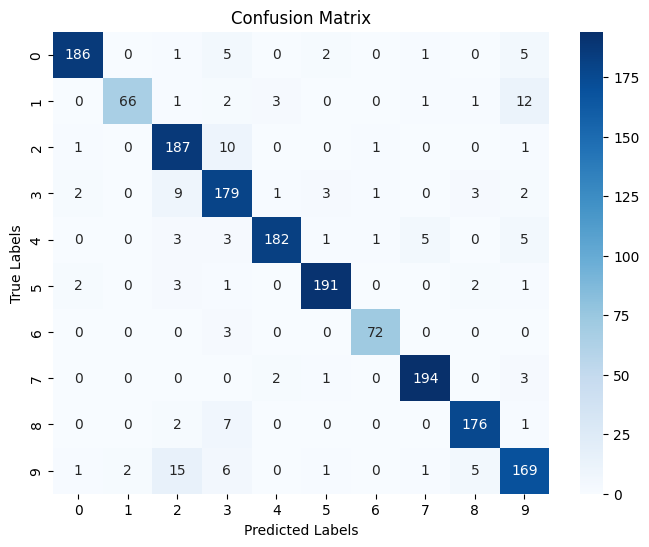

In [21]:
predictions = model.predict(X_test_scaled)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(Y_test, axis=1)  
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=num, yticklabels=num)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [22]:
model.save('trained_cnn_model.h5')